# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold, StratifiedKFold

# IMPORT DATA

In [2]:
df = pd.read_csv('roboticdata.csv')

In [3]:
df.head()

,Number,School,Class,Mathematics,Data Processing,Biology,Chemistry,Physics,Average over all subjects,Class Participation,Robotic Club
0,1,A,ss1,61.0,81.0,69.0,63.0,74.0,75.0,75,0
1,2,A,ss1,84.0,90.0,84.0,79.0,86.0,86.0,85,1
2,3,A,ss1,83.0,91.0,91.0,82.0,92.0,89.0,90,1
3,4,A,ss1,86.0,94.0,75.0,80.0,84.0,85.0,86,1
4,5,A,ss1,68.0,82.0,75.0,66.0,79.0,78.0,75,0


In [4]:
df.count()

Number                       240
School                       240
Class                        240
Mathematics                  239
Data Processing              239
Biology                      239
Chemistry                    239
Physics                      238
Average over all subjects    239
Class Participation          240
Robotic Club                 240
dtype: int64

In [5]:
df = df.fillna(df.mean())

In [6]:
df.count()

Number                       240
School                       240
Class                        240
Mathematics                  240
Data Processing              240
Biology                      240
Chemistry                    240
Physics                      240
Average over all subjects    240
Class Participation          240
Robotic Club                 240
dtype: int64

In [7]:
df.describe()

,Number,Mathematics,Data Processing,Biology,Chemistry,Physics,Average over all subjects,Class Participation,Robotic Club
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,120.50000,74.476987,81.096234,76.945607,73.234310,76.533613,79.594142,77.808333,0.195833
std,69.42622,9.014081,7.995497,8.645093,8.981356,8.475224,7.494386,7.273838,0.397670
min,1.00000,50.000000,50.000000,49.000000,51.000000,52.000000,50.000000,50.000000,0.000000
25%,60.75000,69.000000,75.000000,71.000000,68.000000,71.000000,75.000000,73.750000,0.000000
50%,120.50000,75.000000,81.000000,78.000000,73.000000,75.500000,79.000000,77.000000,0.000000
75%,180.25000,79.000000,87.000000,83.000000,79.000000,81.000000,85.000000,80.000000,0.000000
max,240.00000,98.000000,98.000000,96.000000,97.000000,98.000000,97.000000,100.000000,1.000000


# DATA VISUALIZATION AND REPRESENTATION

In [8]:
school_A_Count = df.loc[df.School == 'A', 'School'].count()
school_B_Count = df.loc[df.School == 'B', 'School'].count()
print(f'Total number of students in School A are {school_A_Count} and total number of students in School B {school_B_Count}')


Total number of students in School A are 118 and total number of students in School B 122


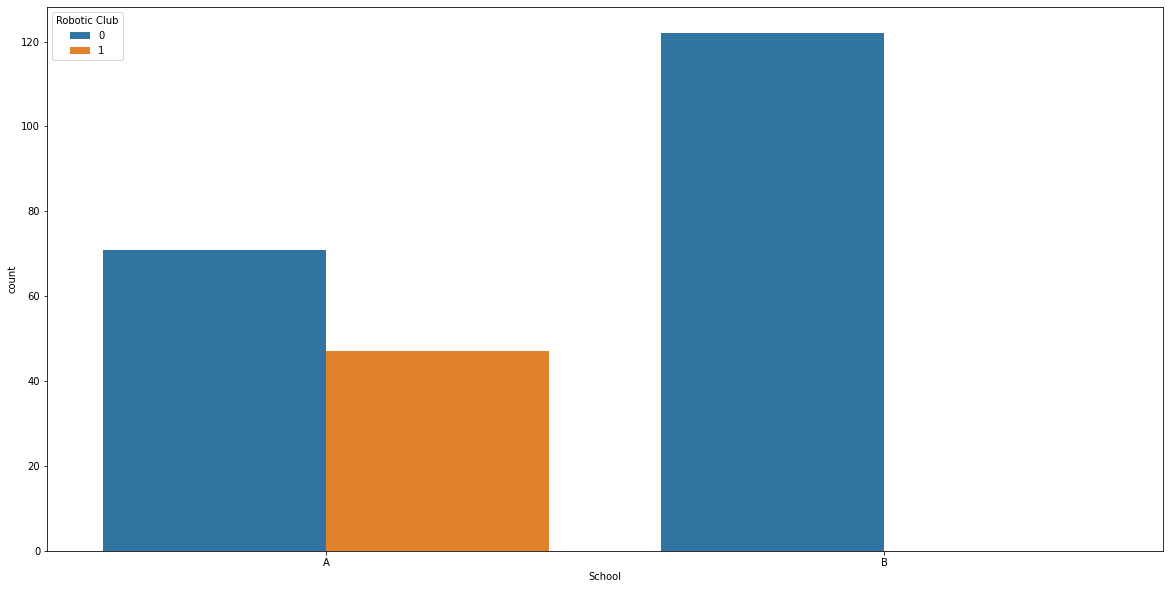

In [9]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('School',hue='Robotic Club',data=df)
plt.show()

In [10]:
df.groupby(['School', 'Robotic Club'])['Robotic Club'].count()

School  Robotic Club
A       0                71
        1                47
B       0               122
Name: Robotic Club, dtype: int64

In [11]:
df['Mathematics_group'] = 0

In [12]:
for i in range(len(df)):
    score = int(df['Mathematics'][i])
    if score <= 39:
        df['Mathematics_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Mathematics_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Mathematics_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Mathematics_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Mathematics_group'][i] = "B"
    elif score >=70:
        df['Mathematics_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

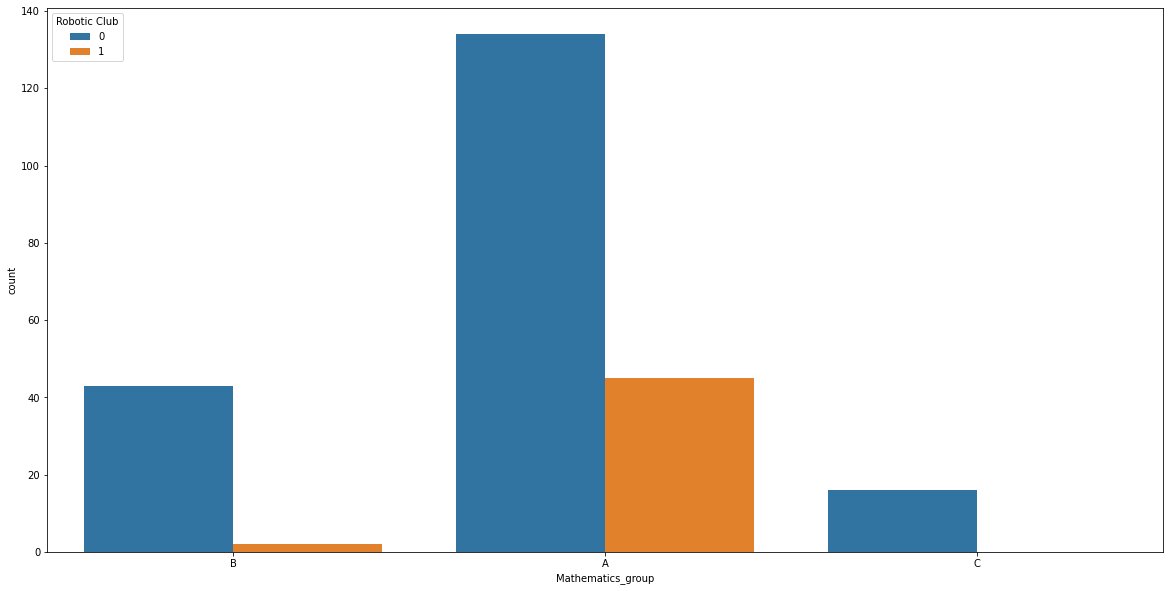

In [13]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Mathematics_group',hue='Robotic Club',data=df)
plt.show()

In [14]:
df['Biology_group'] = 0

In [15]:
for i in range(len(df)):
    score = int(df['Biology'][i])
    if score <= 39:
        df['Biology_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Biology_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Biology_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Biology_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Biology_group'][i] = "B"
    elif score >=70:
        df['Biology_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove th

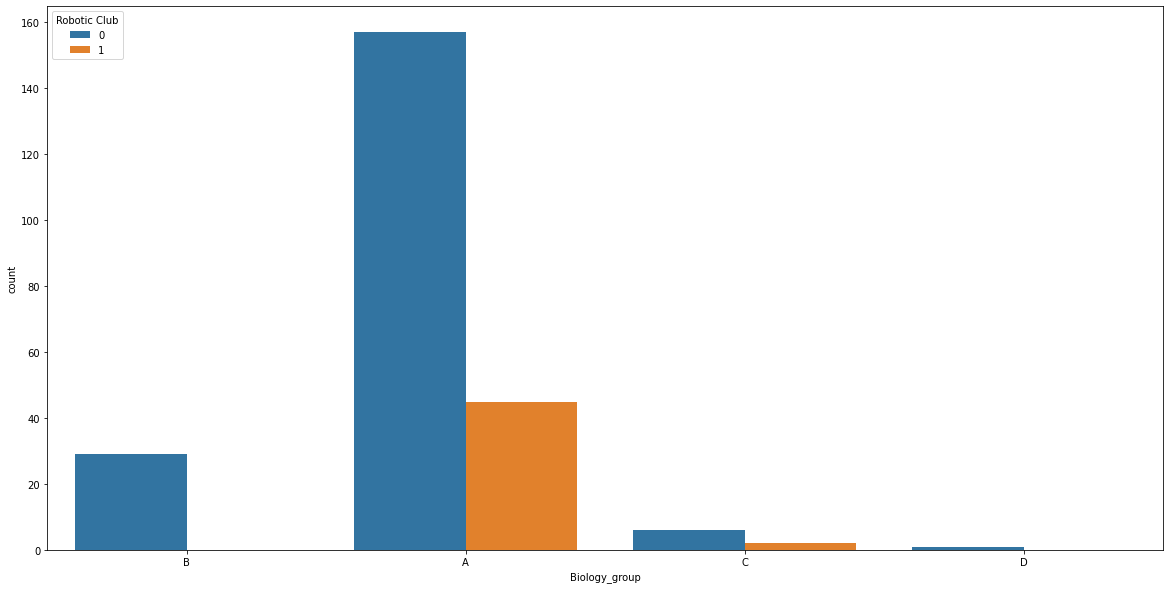

In [16]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Biology_group',hue='Robotic Club',data=df)
plt.show()

In [17]:
df['Chemistry_group'] = 0

In [18]:
for i in range(len(df)):
    score = int(df['Chemistry'][i])
    if score <= 39:
        df['Chemistry_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Chemistry_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Chemistry_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Chemistry_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Chemistry_group'][i] = "B"
    elif score >=70:
        df['Chemistry_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove th

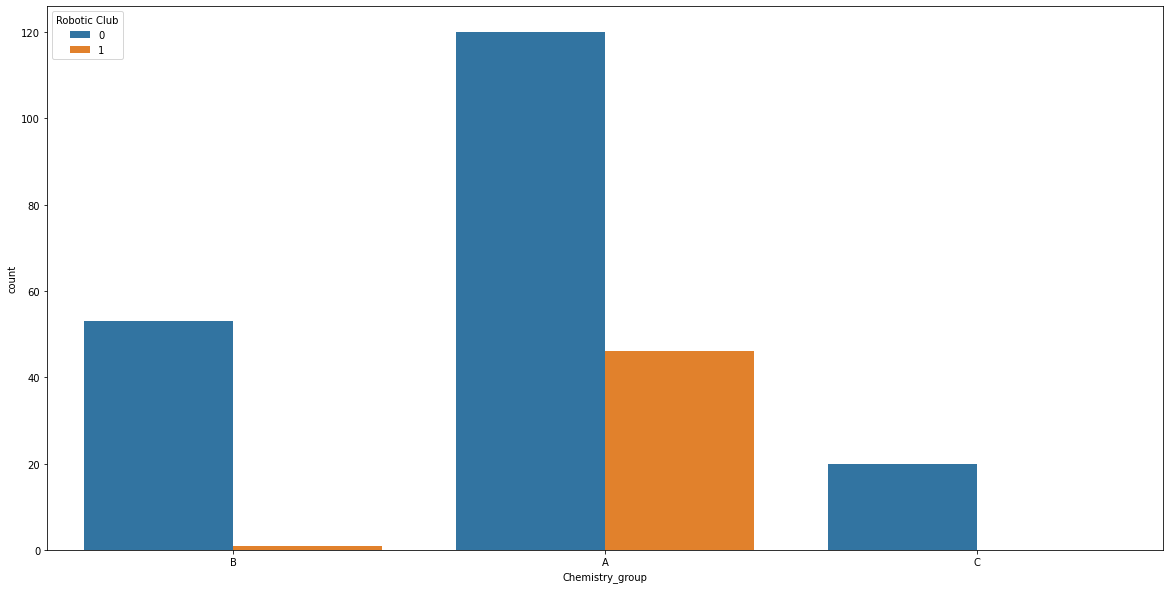

In [19]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chemistry_group',hue='Robotic Club',data=df)
plt.show()

In [20]:
df['Physics_group'] = 0

In [21]:
for i in range(len(df)):
    score = int(df['Physics'][i])
    if score <= 39:
        df['Physics_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Physics_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Physics_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Physics_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Physics_group'][i] = "B"
    elif score >=70:
        df['Physics_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

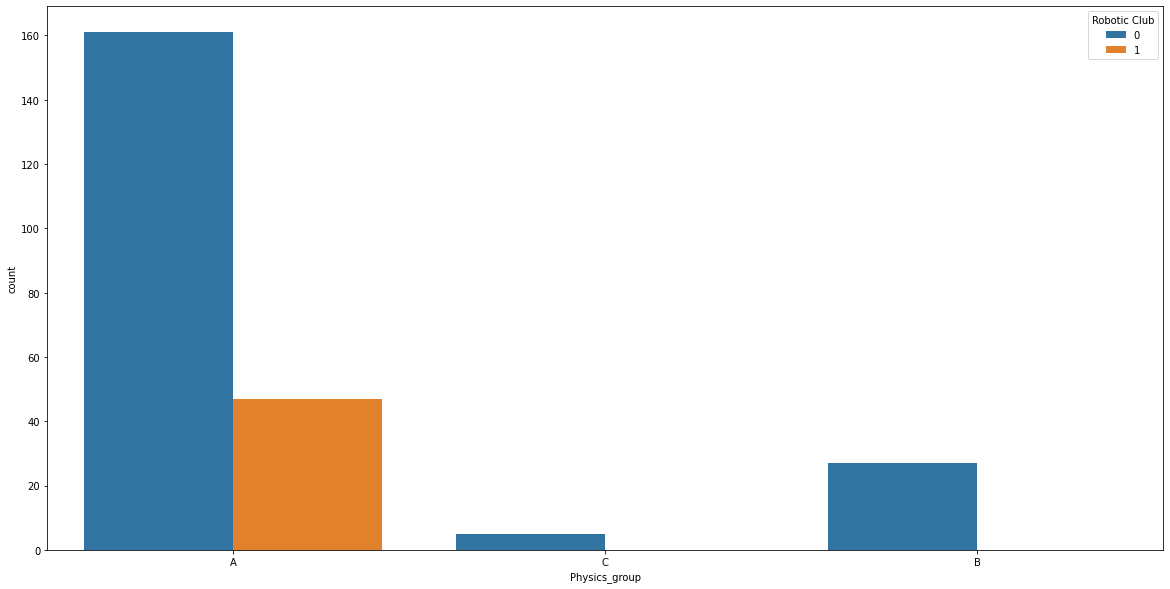

In [22]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Physics_group',hue='Robotic Club',data=df)
plt.show()

In [23]:
df['Data Processing_group'] = 0

In [24]:
for i in range(len(df)):
    score = int(df['Data Processing'][i])
    if score <= 39:
        df['Data Processing_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Data Processing_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Data Processing_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Data Processing_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Data Processing_group'][i] = "B"
    elif score >=70:
        df['Data Processing_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove th

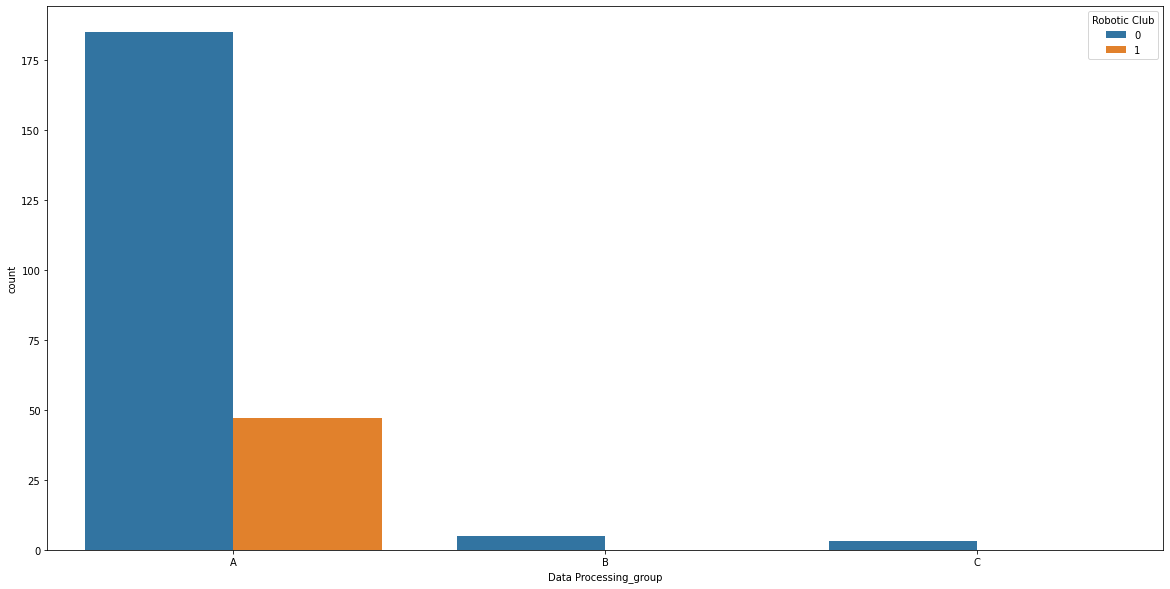

In [25]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Data Processing_group',hue='Robotic Club',data=df)
plt.show()

In [26]:
df['Average over all subjects_group'] = 0

In [27]:
for i in range(len(df)):
    score = int(df['Average over all subjects'][i])
    if score <= 39:
        df['Average over all subjects_group'][i] = "F"
    elif score >=40 and score <= 44:
        df['Average over all subjects_group'][i] = "E"
    elif score >=45 and score <= 49:
        df['Average over all subjects_group'][i] = "D"
    elif score >=50 and score <= 59:
        df['Average over all subjects_group'][i] = "C"
    elif score >=60 and score <= 69:
        df['Average over all subjects_group'][i] = "B"
    elif score >=70:
        df['Average over all subjects_group'][i] = "A"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

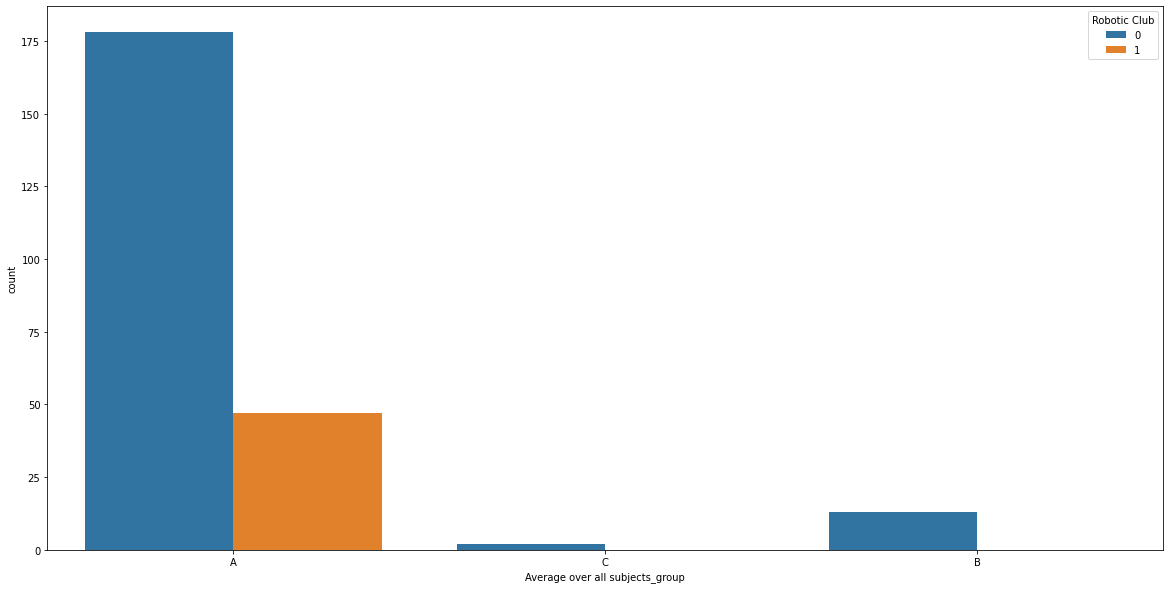

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Average over all subjects_group',hue='Robotic Club',data=df)
plt.show()

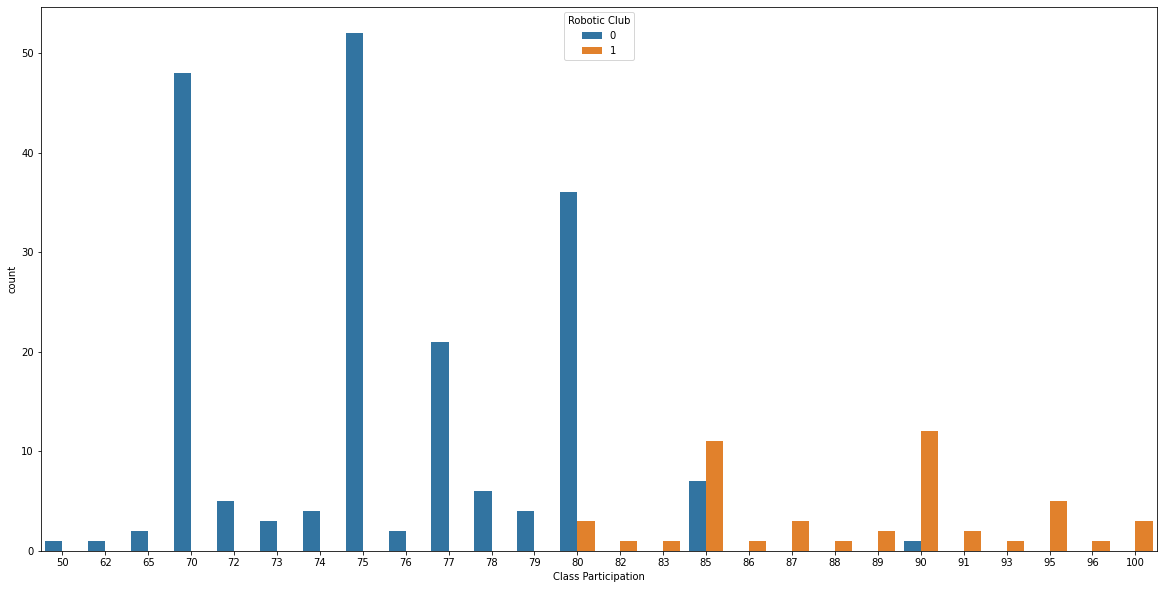

In [29]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Class Participation',hue='Robotic Club',data=df)
plt.show()

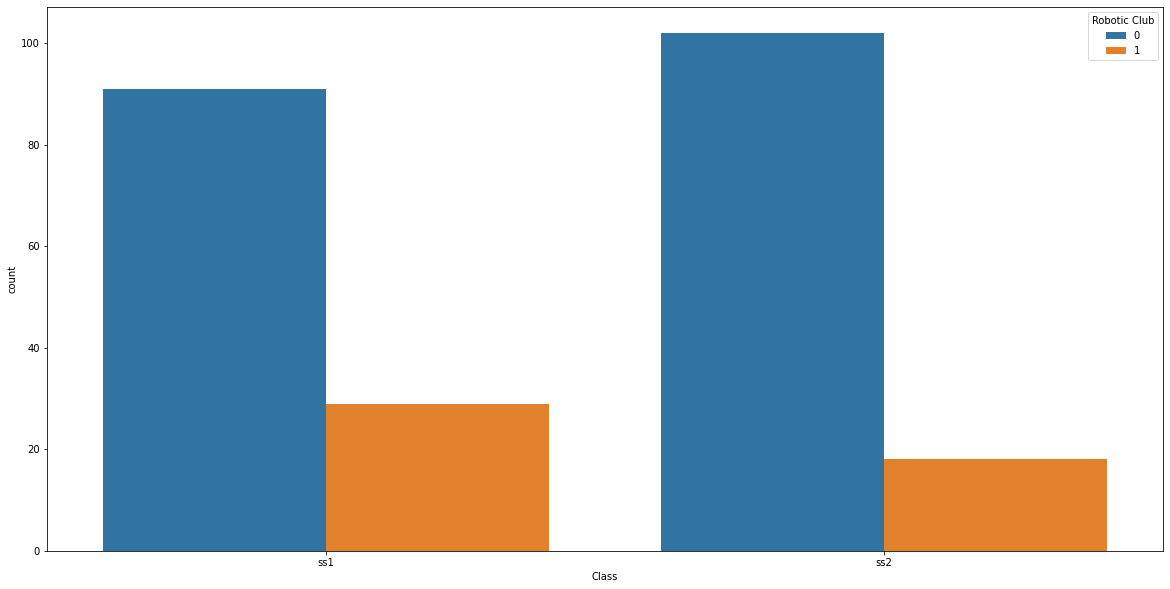

In [30]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Class',hue='Robotic Club',data=df)
plt.show()

In [31]:
df.groupby(['School', 'Class', 'Robotic Club'])['Robotic Club'].count()

School  Class  Robotic Club
A       ss1    0               20
               1               29
        ss2    0               51
               1               18
B       ss1    0               71
        ss2    0               51
Name: Robotic Club, dtype: int64

In [32]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['School'] = lb.fit_transform(df['School'])


In [33]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Class'] = lb.fit_transform(df['Class'])

In [34]:
df['School'] 

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: School, Length: 240, dtype: int64

# CORRELATION MATRIX SHOWING HOW FEATURES RELATE TO EACH OTHER AND TO THE TARGET VALUE

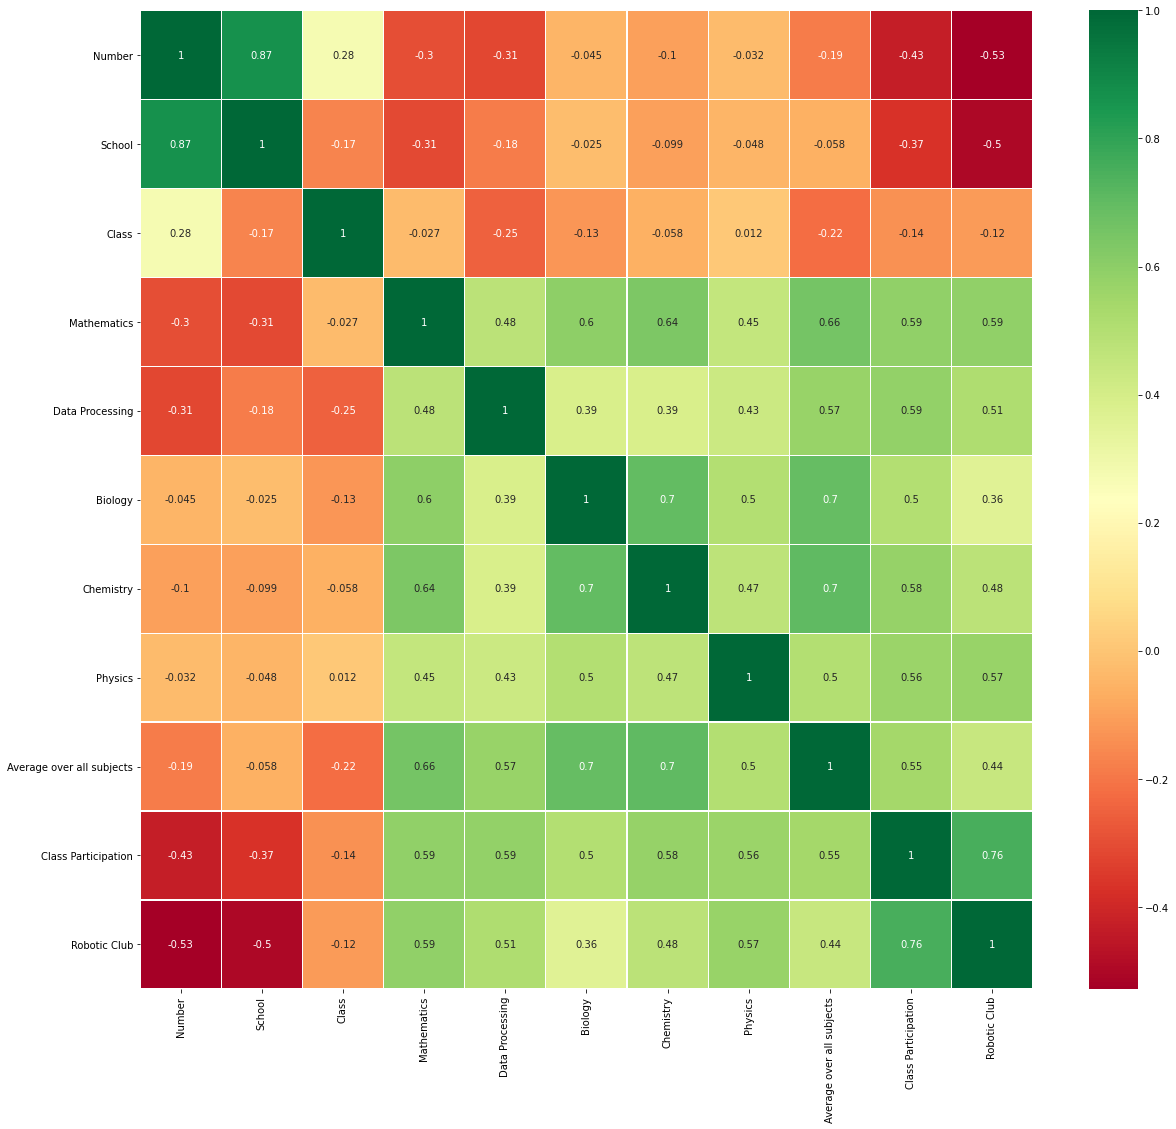

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()   

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


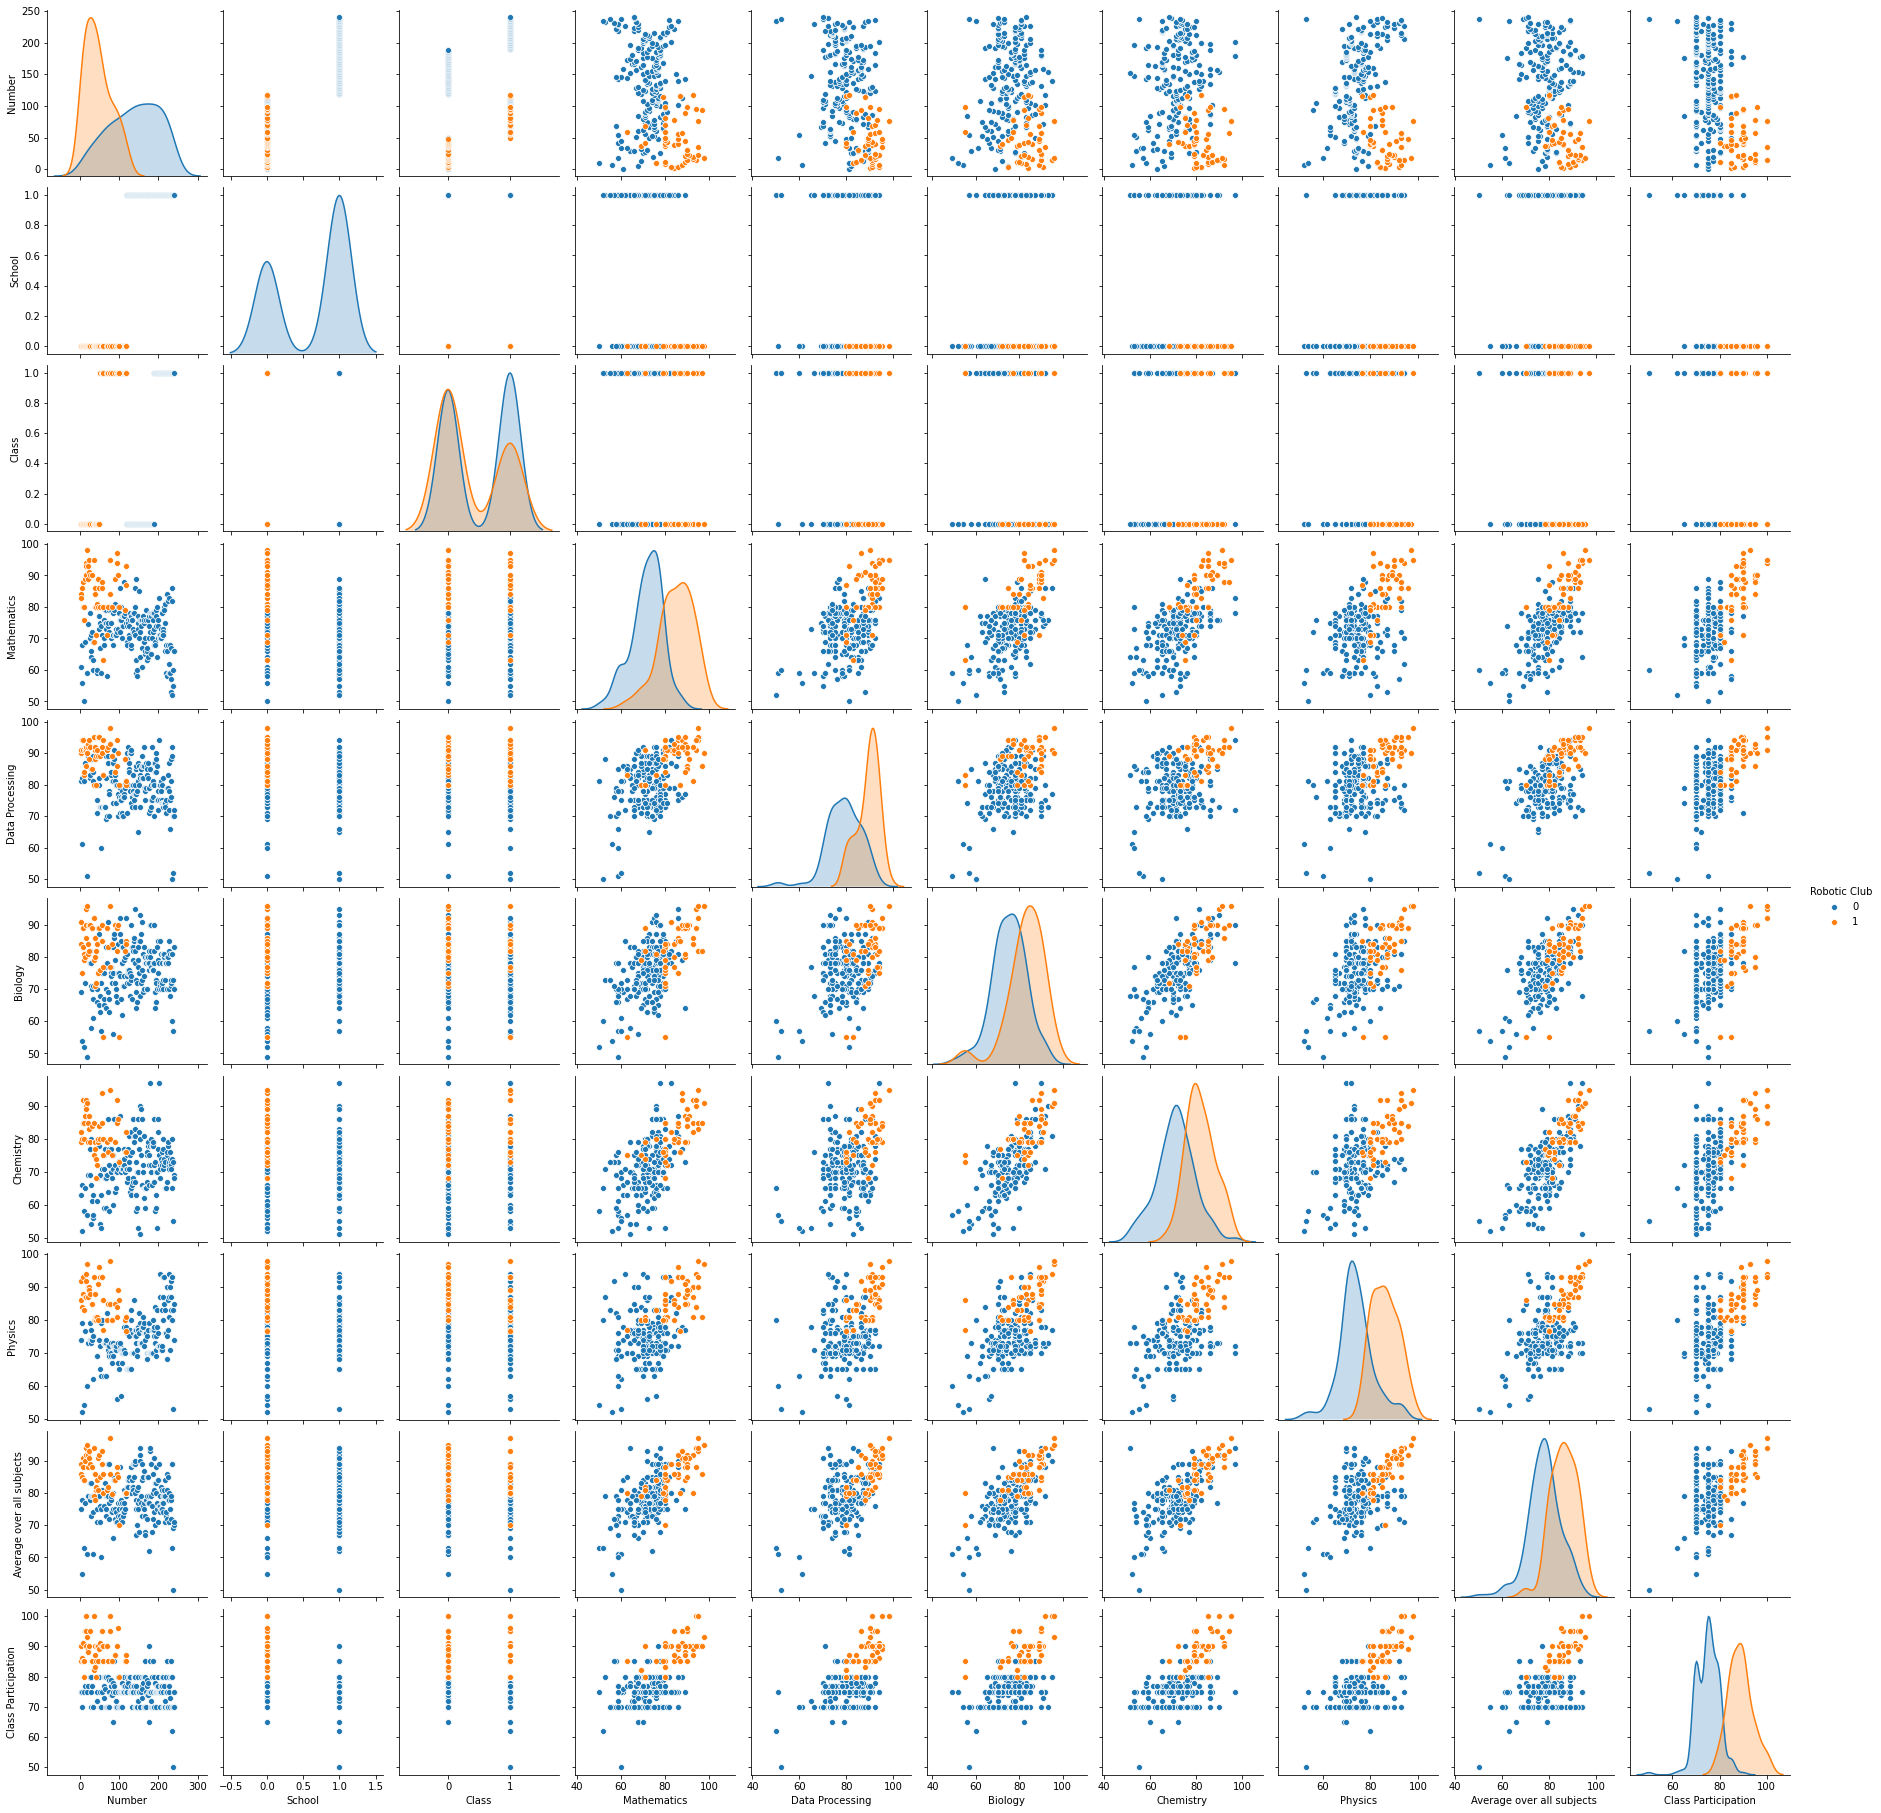

In [36]:
sns.pairplot(df, hue="Robotic Club")
plt.show()

# Split dataset into train and test set

In [37]:
df.columns

Index(['Number', 'School', 'Class', 'Mathematics', 'Data Processing',
       'Biology', 'Chemistry', 'Physics', 'Average over all subjects',
       'Class Participation', 'Robotic Club', 'Mathematics_group',
       'Biology_group', 'Chemistry_group', 'Physics_group',
       'Data Processing_group', 'Average over all subjects_group'],
      dtype='object')

In [38]:
df_with_meanStem = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_meanStem = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Class Participation', 'Robotic Club']]



In [39]:
df_without_meanStem.columns

Index(['School', 'Class', 'Mathematics', 'Data Processing', 'Biology',
       'Chemistry', 'Physics', 'Class Participation', 'Robotic Club'],
      dtype='object')

In [40]:
#data with mean Stem
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_meanStem.drop(['Robotic Club'], axis = 1) , df_with_meanStem['Robotic Club'], test_size=0.3) # 70% training and 30% test

In [41]:
#data without mean Stem
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_meanStem.drop(['Robotic Club'], axis = 1) , df_without_meanStem['Robotic Club'], test_size=0.3) # 70% training and 30% test



# Train Naive Bayes Model

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with mean from stem subject feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with mean from stem subject feature: 0.8888888888888888
f1 score: 0.7142857142857143
precision, recall, F-measure and support: (0.7850267379679144, 0.8971684053651267, 0.8226600985221675, None)


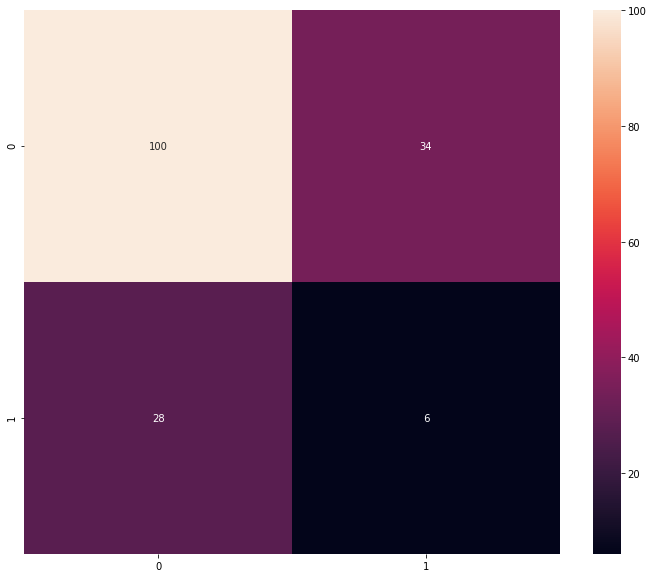

In [45]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [46]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = gnb.predict(X2_test)

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without mean from stem subject feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))


Accuracy without mean from stem subject feature: 0.9305555555555556
f1 score: 0.8387096774193548
precision, recall, F-measure and support: (0.8611111111111112, 0.9576271186440678, 0.8972309449043676, None)


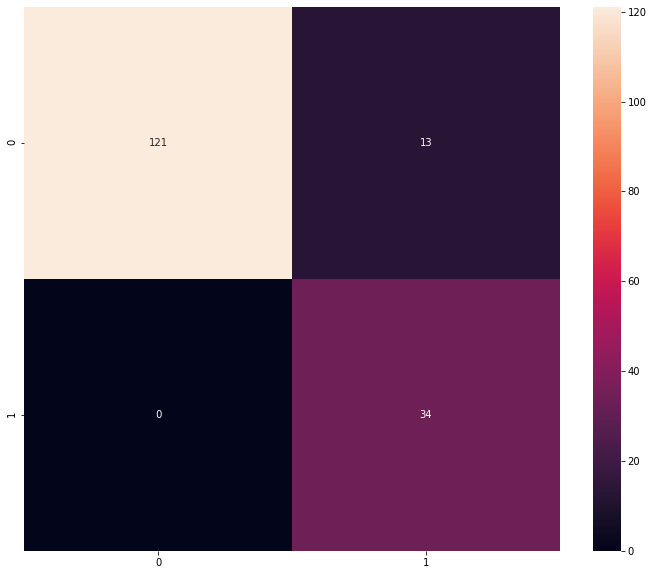

In [48]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [49]:
df_with_classParticipation = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_classParticipation = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Robotic Club']]


In [50]:
#data with Class Participation
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_classParticipation.drop(['Robotic Club'], axis = 1) , df_with_classParticipation['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [51]:
#data without Class Participation
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_classParticipation.drop(['Robotic Club'], axis = 1) , df_without_classParticipation['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [52]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with class participation feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with class participation feature: 0.9722222222222222
f1 score: 0.9500000000000001
precision, recall, F-measure and support: (0.9523809523809523, 0.9811320754716981, 0.9653846153846154, None)


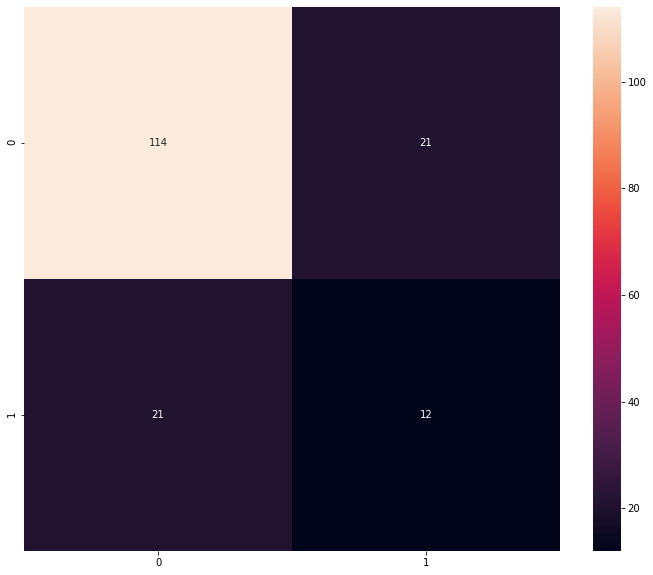

In [54]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [55]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = gnb.predict(X2_test)


In [56]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without class participation feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))

Accuracy without class participation feature: 0.9027777777777778
f1 score: 0.7741935483870968
precision, recall, F-measure and support: (0.83475935828877, 0.8854679802955665, 0.8561233228661147, None)


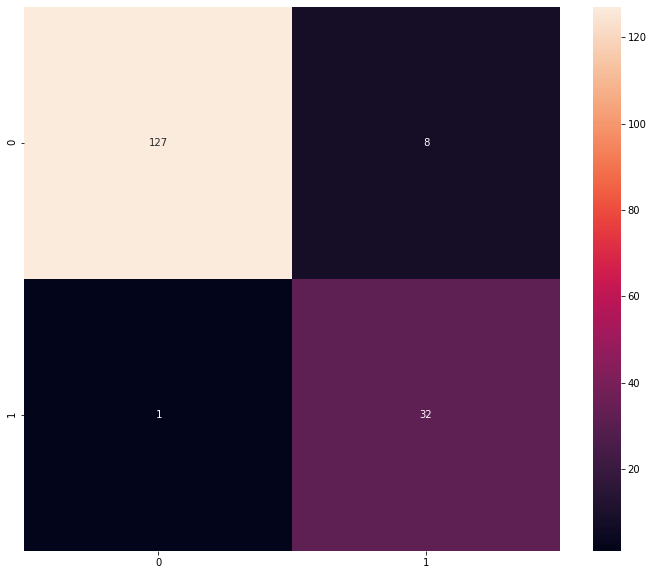

In [57]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [58]:
df_with_Mathematics = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_Mathematics = df[['School', 'Class', 'Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


In [59]:
#data with Mathematics
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_Mathematics.drop(['Robotic Club'], axis = 1) , df_with_Mathematics['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [60]:
#data without Mathematics
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_Mathematics.drop(['Robotic Club'], axis = 1) , df_without_classParticipation['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [61]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Mathematics feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with Mathematics feature: 0.9027777777777778
f1 score: 0.7586206896551724
precision, recall, F-measure and support: (0.8144385026737968, 0.9083333333333333, 0.8488755622188906, None)


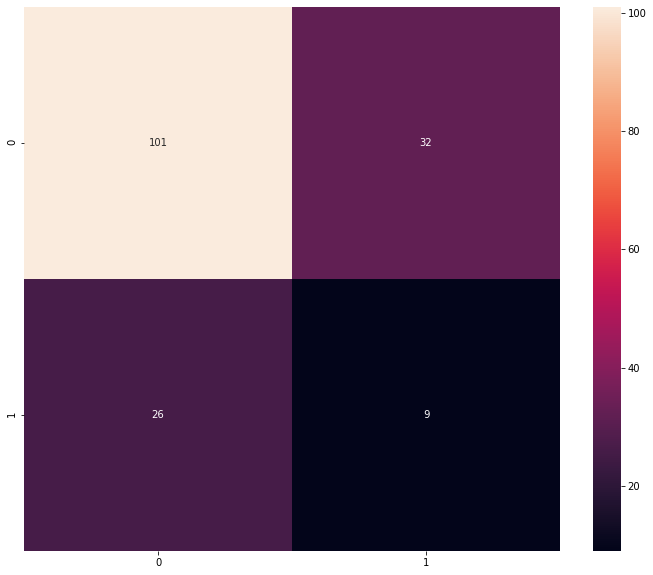

In [63]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [64]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X2_test)


In [65]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without Mathematics feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))


Accuracy without Mathematics feature: 0.6805555555555556
f1 score: 0.20689655172413793
precision, recall, F-measure and support: (0.5064171122994652, 0.5083333333333333, 0.503448275862069, None)


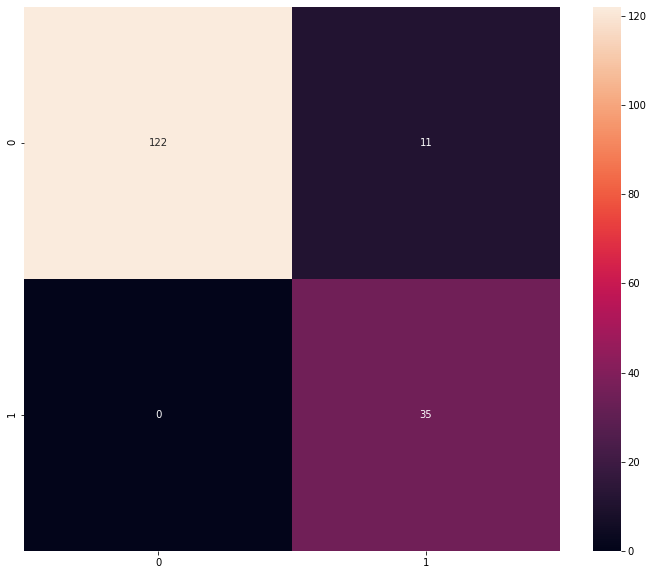

In [66]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [67]:
df.columns

Index(['Number', 'School', 'Class', 'Mathematics', 'Data Processing',
       'Biology', 'Chemistry', 'Physics', 'Average over all subjects',
       'Class Participation', 'Robotic Club', 'Mathematics_group',
       'Biology_group', 'Chemistry_group', 'Physics_group',
       'Data Processing_group', 'Average over all subjects_group'],
      dtype='object')

In [68]:
df_with_data_Processing = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_data_Processing = df[['School', 'Class', 'Mathematics', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


In [69]:
#data with Data Processing
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_data_Processing.drop(['Robotic Club'], axis = 1) , df_with_data_Processing['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [70]:
#data without Data Processing
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_data_Processing.drop(['Robotic Club'], axis = 1) , df_without_data_Processing['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [71]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Data Processing feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with Data Processing feature: 0.9722222222222222
f1 score: 0.9444444444444444
precision, recall, F-measure and support: (0.9473684210526316, 0.9818181818181818, 0.962962962962963, None)


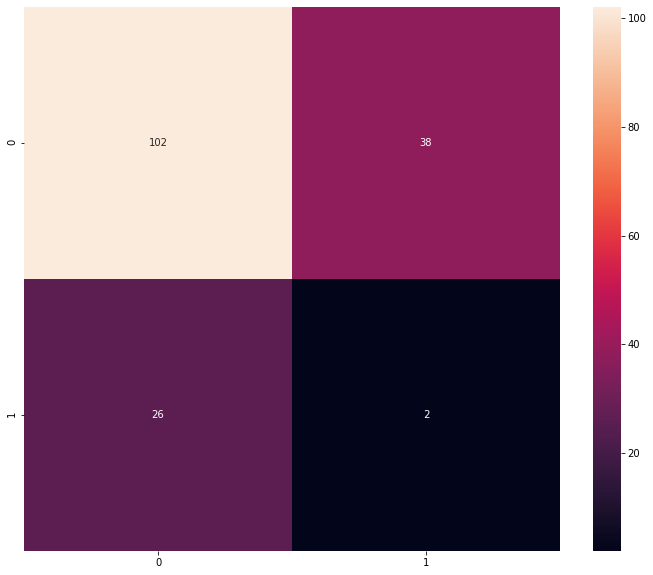

In [73]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [74]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X2_test)


In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without Data Processing feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))

Accuracy without Data Processing feature: 0.7222222222222222
f1 score: 0.4444444444444444
precision, recall, F-measure and support: (0.6352941176470588, 0.6256206554121152, 0.6296296296296297, None)


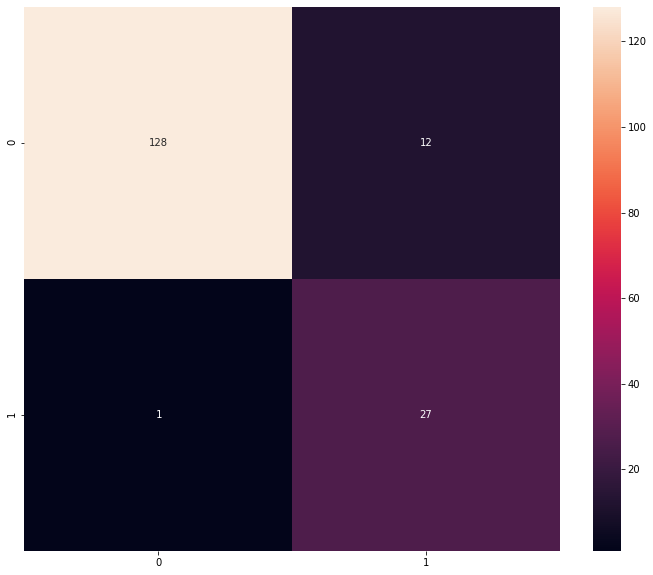

In [76]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [77]:
df_with_Biology = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_Biology = df[['School', 'Class', 'Mathematics', 'Data Processing', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


In [78]:
#data with Biology
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_Biology.drop(['Robotic Club'], axis = 1) , df_with_Biology['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [79]:
#data without Biology
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_Biology.drop(['Robotic Club'], axis = 1) , df_without_Biology['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [80]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Biology feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with Biology feature: 0.9305555555555556
f1 score: 0.7826086956521738
precision, recall, F-measure and support: (0.8376792698826597, 0.917741935483871, 0.8706431908012935, None)


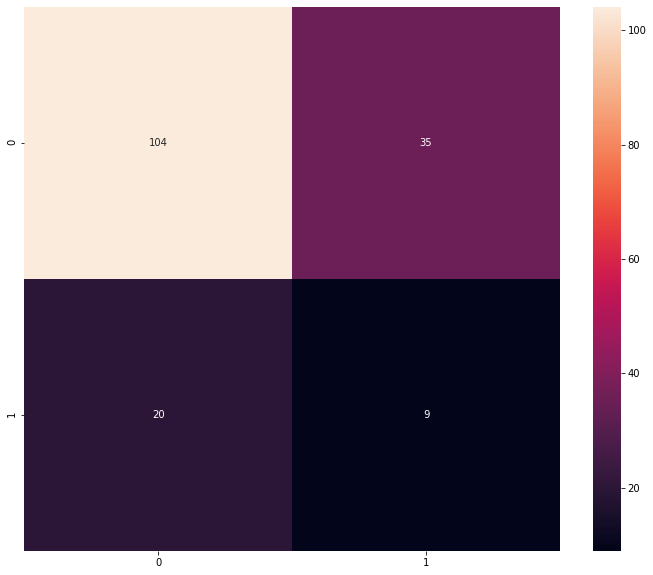

In [82]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [83]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X2_test)


In [84]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without Biology feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))

Accuracy without Biology feature: 0.5694444444444444
f1 score: 0.11428571428571428
precision, recall, F-measure and support: (0.41336898395721927, 0.41666666666666663, 0.4149410222804718, None)


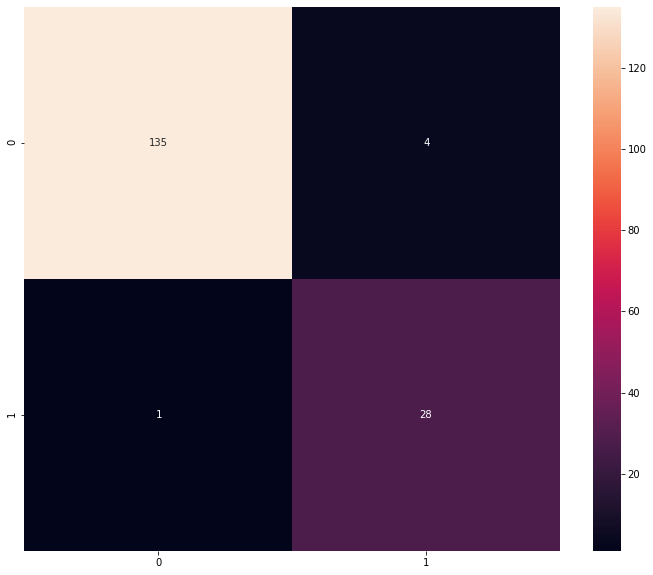

In [85]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [86]:
df_with_Chemistry = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_Chemistry = df[['School', 'Class', 'Mathematics', 'Data Processing', 'Biology', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


In [87]:
#data with Chemistry
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_Chemistry.drop(['Robotic Club'], axis = 1) , df_with_Chemistry['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [88]:
#data without Cheemistry
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_Chemistry.drop(['Robotic Club'], axis = 1) , df_without_Chemistry['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [89]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Chemistry feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with Chemistry feature: 0.9583333333333334
f1 score: 0.9090909090909091
precision, recall, F-measure and support: (0.9508928571428572, 0.9320855614973262, 0.941031941031941, None)


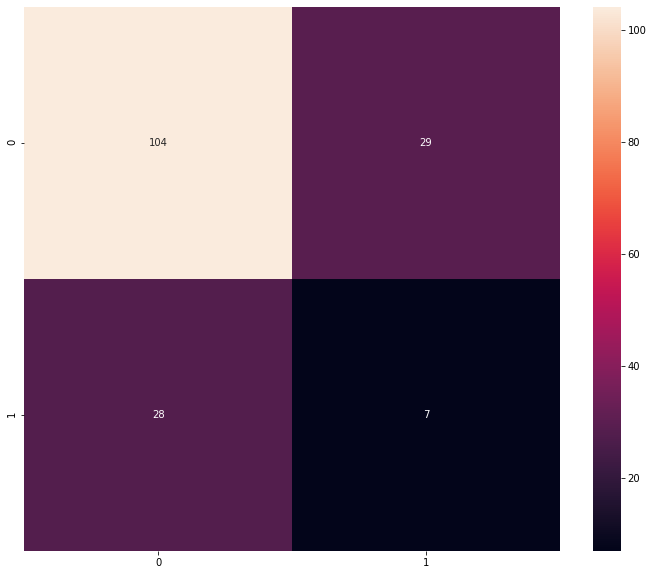

In [91]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [92]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X2_test)


In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without Chemistry feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))



Accuracy without Chemistry feature: 0.6527777777777778
f1 score: 0.13793103448275862
precision, recall, F-measure and support: (0.46791443850267384, 0.4583333333333333, 0.46026986506746626, None)


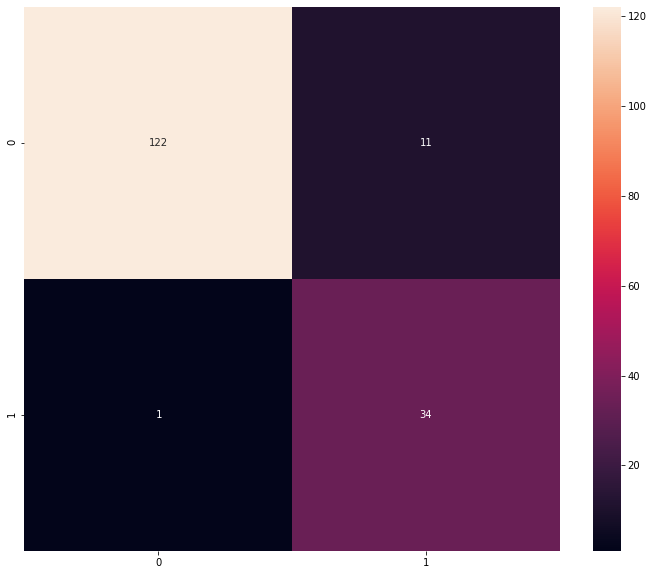

In [94]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [95]:
df_with_Physics = df[['School', 'Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df_without_Physics = df[['School', 'Class', 'Mathematics', 'Data Processing', 'Biology', 'Chemistry', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


In [96]:
#data with Physics
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_Physics.drop(['Robotic Club'], axis = 1) , df_with_Physics['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [97]:
#data without Physics
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_Physics.drop(['Robotic Club'], axis = 1) , df_without_Physics['Robotic Club'], test_size=0.3) # 70% training and 30% test



In [98]:
#Train the model using the training sets
gnb.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb.predict(X1_test)


In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy with Physics feature:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy with Physics feature: 0.9583333333333334
f1 score: 0.9189189189189189
precision, recall, F-measure and support: (0.925, 0.9727272727272727, 0.9454407678706744, None)


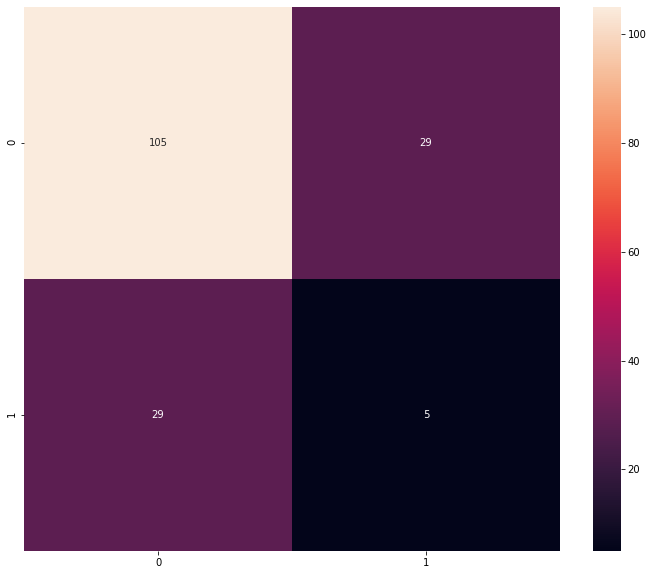

In [100]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [101]:
#Train the model using the training sets
gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X2_test)


In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy without Physics feature:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))


Accuracy without Physics feature: 0.6388888888888888
f1 score: 0.13333333333333333
precision, recall, F-measure and support: (0.45882352941176474, 0.4498044328552803, 0.4526315789473684, None)


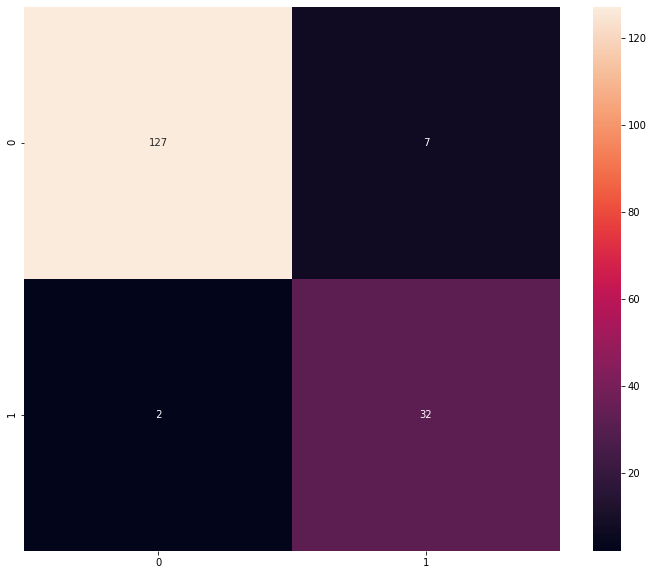

In [103]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

# CHI SQUARE SHOWING FEATURE IMPORTANCE

In [104]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(df[['School', 'Class', 'Mathematics', 'Data Processing',
       'Biology', 'Chemistry', 'Physics', 'Average over all subjects',
       'Class Participation']], df['Robotic Club'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df[['School', 'Class', 'Mathematics', 'Data Processing',
       'Biology', 'Chemistry', 'Physics', 'Average over all subjects',
       'Class Participation']].columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print top 9 features


                       Specs      Score
8        Class Participation  92.658408
2                Mathematics  90.806404
6                    Physics  73.613976
5                  Chemistry  59.841644
3            Data Processing  49.236365
7  Average over all subjects  33.123795
4                    Biology  30.240370
0                     School  29.709845
1                      Class   1.600706


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING NAIVE BAYES

In [105]:
df_1 = df[['Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]

dfx_1 = df[['Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation']]
dfy_1 = df[['Robotic Club']]


df1_x = df_with_meanStem[['Class', 'Mathematics', 'Data Processing', 'Biology',
       'Chemistry', 'Physics', 'Average over all subjects',
       'Class Participation']]
df1_y = df_with_meanStem['Robotic Club']




In [106]:
#data with df
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_1.drop(['Robotic Club'], axis = 1) , df_1['Robotic Club'], test_size=0.3) # 70% training and 30% test


In [107]:
gnb_robotics = GaussianNB()

#Train the model using the training sets
gnb_robotics.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb_robotics.predict(X1_test)


In [108]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("f1 score:",f1_score(y1_test, y1_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred, average='macro'))


Accuracy: 0.9861111111111112
f1 score: 0.962962962962963
precision, recall, F-measure and support: (0.9642857142857143, 0.9915254237288136, 0.9772079772079773, None)


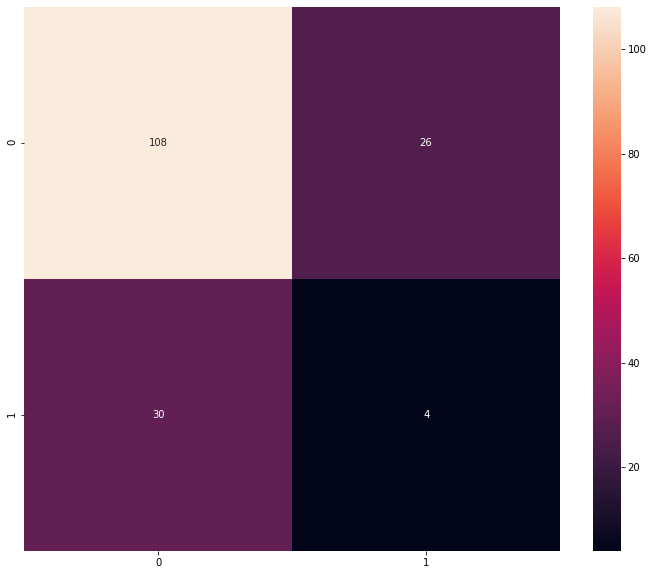

In [109]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [110]:
#Using kfolds with K = 5
gnb_robotics = GaussianNB()
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x 
y = df1_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    gnb_robotics.fit(X.iloc[train], y.iloc[train])
    y_pred = gnb_robotics.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.958333,0.900000,"(0.9090909090909092, 0.9743589743589743, 0.936..."
1,1,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
2,2,0.958333,0.833333,"(0.8571428571428572, 0.9767441860465116, 0.904..."
3,3,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"
4,4,0.916667,0.800000,"(0.905982905982906, 0.8501228501228502, 0.8736..."


In [111]:
#Using Stratified kfolds with K = 5
gnb_robotics = GaussianNB()
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x
y = df1_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    gnb_robotics.fit(X.iloc[train], y.iloc[train])
    y_pred = gnb_robotics.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.941176,"(0.9444444444444444, 0.9875, 0.964259121370067..."
1,1,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."
2,2,0.937500,0.800000,"(0.8333333333333333, 0.9642857142857143, 0.881..."
3,3,0.916667,0.800000,"(0.8736842105263158, 0.8736842105263158, 0.873..."
4,4,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING SUPPORT VECTOR MACHINE


In [112]:
from sklearn.svm import SVC
svclassifier_1 = SVC(kernel='linear')
svclassifier_1.fit(X1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
y1_pred_SVM = svclassifier_1.predict(X1_test)

In [114]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred_SVM))
print("f1 score:",f1_score(y1_test, y1_pred_SVM))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_pred_SVM, average='macro'))


Accuracy: 1.0
f1 score: 1.0
precision, recall, F-measure and support: (1.0, 1.0, 1.0, None)


In [115]:
#Using kfolds with K = 5
svclassifier_1 = SVC(kernel='linear')
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x 
y = df1_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    svclassifier_1.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_1.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.952381,"(0.9545454545454546, 0.986842105263158, 0.9695..."
1,1,0.937500,0.823529,"(0.8760683760683761, 0.9125, 0.892777364110201..."
2,2,0.875000,0.700000,"(0.9268292682926829, 0.7692307692307692, 0.810..."
3,3,0.979167,0.952381,"(0.9545454545454546, 0.986842105263158, 0.9695..."
4,4,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."


In [116]:
#Using Stratified kfolds with K = 5
svclassifier_1 = SVC(kernel='linear')
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x
y = df1_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    svclassifier_1.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_1.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.958333,0.900000,"(0.9743589743589743, 0.9090909090909092, 0.936..."
1,1,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."
2,2,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."
3,3,0.895833,0.761905,"(0.8605263157894737, 0.8366093366093366, 0.847..."
4,4,0.979167,0.947368,"(0.95, 0.9871794871794872, 0.9671907040328093,..."


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING DECISION TREE

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X1_train, y1_train)

#Predict the response for test dataset
y_pred = clf1.predict(X1_test)

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print("f1 score:",f1_score(y1_test, y_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y_pred, average='macro'))


Accuracy: 1.0
f1 score: 1.0
precision, recall, F-measure and support: (1.0, 1.0, 1.0, None)


In [120]:
#Using kfolds with K = 5
clf11 = DecisionTreeClassifier()
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x 
y = df1_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    clf11.fit(X.iloc[train], y.iloc[train])
    y_pred = clf11.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.952381,"(0.9545454545454546, 0.986842105263158, 0.9695..."
1,1,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
2,2,0.958333,0.857143,"(0.9163763066202091, 0.9163763066202091, 0.916..."
3,3,0.937500,0.869565,"(0.9275184275184275, 0.9027777777777778, 0.914..."
4,4,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."


In [121]:
#Using Stratified kfolds with K = 5
clf1 = DecisionTreeClassifier()
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x
y = df1_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    clf1.fit(X.iloc[train], y.iloc[train])
    y_pred = clf1.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"
1,1,0.979167,0.947368,"(0.9871794871794872, 0.95, 0.9671907040328093,..."
2,2,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
3,3,0.958333,0.900000,"(0.9368421052631579, 0.9368421052631579, 0.936..."
4,4,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING K NEAREST NEIGBOUR

In [122]:
from sklearn.neighbors import KNeighborsClassifier 

In [123]:
model = KNeighborsClassifier() 
model.fit(X1_train,y1_train)
y_pred = model.predict(X1_test)

In [124]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print("f1 score:",f1_score(y1_test, y_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y_pred, average='macro'))


Accuracy: 0.9861111111111112
f1 score: 0.962962962962963
precision, recall, F-measure and support: (0.9642857142857143, 0.9915254237288136, 0.9772079772079773, None)


In [125]:
#Using kfolds with K = 5
model = KNeighborsClassifier() 
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x 
y = df1_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = model.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.958333,0.900000,"(0.9090909090909092, 0.9743589743589743, 0.936..."
1,1,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
2,2,0.979167,0.923077,"(0.9285714285714286, 0.9880952380952381, 0.955..."
3,3,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"
4,4,0.958333,0.888889,"(0.9316239316239316, 0.9316239316239316, 0.931..."


In [126]:
#Using Stratified kfolds with K = 5
model = KNeighborsClassifier() 
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x
y = df1_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = model.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.941176,"(0.9444444444444444, 0.9875, 0.964259121370067..."
1,1,0.979167,0.947368,"(0.9871794871794872, 0.95, 0.9671907040328093,..."
2,2,0.937500,0.800000,"(0.8333333333333333, 0.9642857142857143, 0.881..."
3,3,0.916667,0.800000,"(0.8736842105263158, 0.8736842105263158, 0.873..."
4,4,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING RANDOM FOREST


In [127]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_predA=clf.predict(X1_test)


In [128]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predA))
print("f1 score:",f1_score(y1_test, y1_predA))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y1_test, y1_predA, average='macro'))


Accuracy: 1.0
f1 score: 1.0
precision, recall, F-measure and support: (1.0, 1.0, 1.0, None)


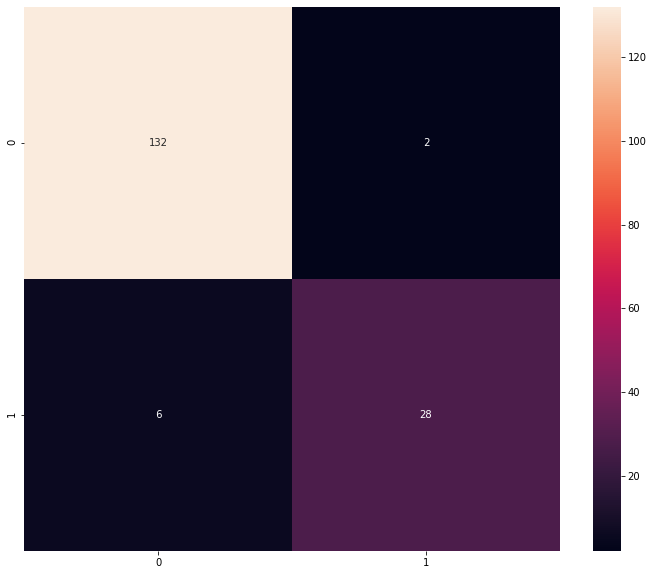

In [129]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X1_train,y1_train,cv=10)
sns.heatmap(confusion_matrix(y1_train,y_pred),annot=True,fmt='2.0f')

In [130]:
#Using kfolds with K = 5
clf=RandomForestClassifier(n_estimators=20)
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x 
y = df1_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.952381,"(0.9545454545454546, 0.986842105263158, 0.9695..."
1,1,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
2,2,0.937500,0.800000,"(0.9041811846689896, 0.8625, 0.881481481481481..."
3,3,0.979167,0.952381,"(0.9545454545454546, 0.986842105263158, 0.9695..."
4,4,0.979167,0.941176,"(0.9444444444444444, 0.9875, 0.964259121370067..."


In [131]:
#Using Stratified kfolds with K = 5
clf=RandomForestClassifier(n_estimators=20)
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df1_x
y = df1_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.979167,0.947368,"(0.9871794871794872, 0.95, 0.9671907040328093,..."
1,1,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"
2,2,0.958333,0.875000,"(0.8888888888888888, 0.975609756097561, 0.925,..."
3,3,0.937500,0.842105,"(0.8868421052631579, 0.9188034188034188, 0.901..."
4,4,1.000000,1.000000,"(1.0, 1.0, 1.0, None)"


# Best performing model is RANDOM FOREST so we will be using it to build our final classifier for predicting the chancs of joining roobtics club





# MODEL TO PREDICT STUDENTS SCHOOL  USING NAIVE BAYES

In [132]:
df_2 = df[['Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club', 'School']]

df2_x = df[['Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]
df2_y = df[['School']]


In [133]:
#data with df
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df_2.drop(['School'], axis = 1) , df_2['School'], test_size=0.3) # 70% training and 30% test


In [134]:
gnb_school = GaussianNB()

#Train the model using the training sets
gnb_school.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = gnb_school.predict(X2_test)


In [135]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("f1 score:",f1_score(y2_test, y2_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred, average='macro'))



Accuracy: 0.7083333333333334
f1 score: 0.7341772151898733
precision, recall, F-measure and support: (0.79, 0.7558139534883721, 0.7055501460564751, None)


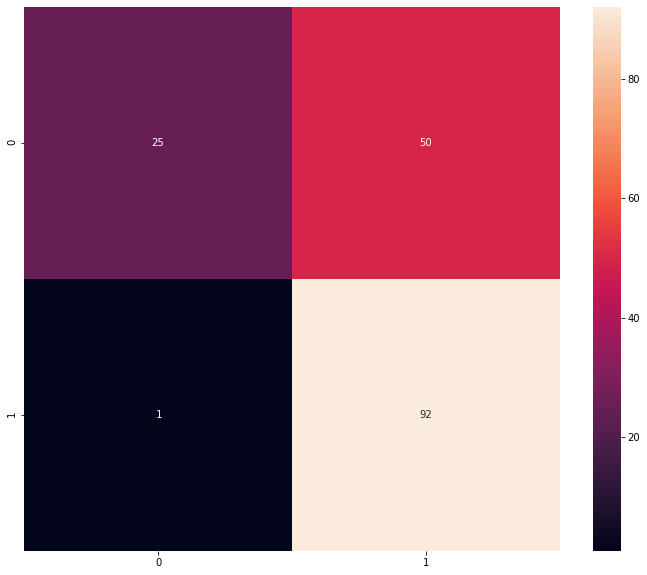

In [136]:
svclassifier_1f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(GaussianNB(),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [137]:
#Using kfolds with K = 5
gnb_school = GaussianNB()
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x 
y = df2_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    gnb_school.fit(X.iloc[train], y.iloc[train])
    y_pred = gnb_school.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array w

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.625000,0.678571,"(0.6714285714285714, 0.7222222222222222, 0.614..."
1,1,0.708333,0.781250,"(0.6956521739130435, 0.8205128205128205, 0.671..."
2,2,0.791667,0.861111,"(0.7058823529411764, 0.8780487804878049, 0.722..."
3,3,0.645833,0.701754,"(0.6964285714285714, 0.7702702702702703, 0.632..."
4,4,0.729167,0.800000,"(0.7045454545454546, 0.8333333333333333, 0.690..."


In [138]:
#Using Stratified kfolds with K = 5
gnb_school = GaussianNB()
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x
y = df2_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    gnb_school.fit(X.iloc[train], y.iloc[train])
    y_pred = gnb_school.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array w

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.666667,0.750000,"(0.6666666666666666, 0.8, 0.625, None)"
1,1,0.666667,0.750000,"(0.6666666666666666, 0.8, 0.625, None)"
2,2,0.645833,0.730159,"(0.6458333333333334, 0.7393162393162394, 0.607..."
3,3,0.708333,0.781250,"(0.6956521739130435, 0.8205128205128205, 0.671..."
4,4,0.812500,0.847458,"(0.8043478260869565, 0.8676470588235294, 0.802..."


# MODEL TO PREDICT STUDENTS SCHOOL USING RANDOM FOREST


In [139]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

y2_predA=clf.predict(X2_test)

In [140]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predA))
print("f1 score:",f1_score(y2_test, y2_predA))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_predA, average='macro'))


Accuracy: 0.7638888888888888
f1 score: 0.7384615384615385
precision, recall, F-measure and support: (0.7638888888888888, 0.7742582197273455, 0.7616358325219085, None)


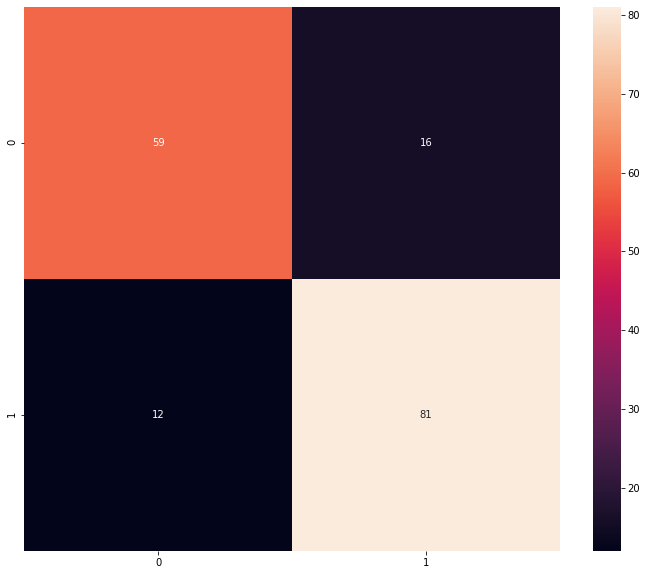

In [141]:
f,ax=plt.subplots(0,0,figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X2_train,y2_train,cv=10)
sns.heatmap(confusion_matrix(y2_train,y_pred),annot=True,fmt='2.0f')

In [142]:
#Using kfolds with K = 5
clf=RandomForestClassifier(n_estimators=20)
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x 
y = df2_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.750000,0.684211,"(0.7357142857142858, 0.7444444444444445, 0.738..."
1,1,0.875000,0.875000,"(0.8765217391304347, 0.8765217391304347, 0.874..."
2,2,0.833333,0.870968,"(0.8178368121442126, 0.8178368121442126, 0.817..."
3,3,0.875000,0.863636,"(0.8857142857142857, 0.875, 0.8741258741258742..."
4,4,0.875000,0.888889,"(0.8706293706293706, 0.8785714285714286, 0.873..."


In [143]:
#Using Stratified kfolds with K = 5
clf=RandomForestClassifier(n_estimators=20)
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x
y = df2_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.770833,0.775510,"(0.7708333333333333, 0.771304347826087, 0.7707..."
1,1,0.854167,0.862745,"(0.8541666666666666, 0.8597883597883598, 0.853..."
2,2,0.791667,0.791667,"(0.7916666666666666, 0.7916666666666666, 0.791..."
3,3,0.833333,0.846154,"(0.831304347826087, 0.8359788359788359, 0.8321..."
4,4,0.895833,0.905660,"(0.8930434782608696, 0.9035714285714285, 0.894..."


# MODEL TO PREDICT STUDENTS SCHOOL USING SUPPORT VECTOR MACHINE

In [144]:
from sklearn.svm import SVC
svclassifier_2 = SVC(kernel='linear')
svclassifier_2.fit(X2_train, y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
y2_pred_SVM = svclassifier_2.predict(X2_test)

In [146]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred_SVM))
print("f1 score:",f1_score(y2_test, y2_pred_SVM))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y2_pred_SVM, average='macro'))


Accuracy: 0.8194444444444444
f1 score: 0.7796610169491527
precision, recall, F-measure and support: (0.8119047619047619, 0.8151563753007218, 0.8133599202392823, None)


In [147]:
#Using kfolds with K = 5
svclassifier_22 = SVC(kernel='linear')
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x 
y = df2_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    svclassifier_22.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_22.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was pass

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.729167,0.666667,"(0.7178571428571429, 0.721415607985481, 0.7192..."
1,1,0.854167,0.862745,"(0.8530434782608696, 0.8548951048951049, 0.853..."
2,2,0.750000,0.785714,"(0.7666034155597723, 0.7443478260869565, 0.742..."
3,3,0.791667,0.761905,"(0.7928571428571429, 0.7867132867132867, 0.788..."
4,4,0.895833,0.905660,"(0.8933566433566433, 0.8968253968253967, 0.894..."


In [148]:
#Using Stratified kfolds with K = 5
svclassifier_2 = SVC(kernel='linear')
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x
y = df2_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    svclassifier_2.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_2.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was pass

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.854167,0.851064,"(0.8541666666666667, 0.8547826086956521, 0.854..."
1,1,0.812500,0.830189,"(0.8125, 0.8266787658802177, 0.810443176831943..."
2,2,0.708333,0.666667,"(0.7083333333333334, 0.7222222222222222, 0.703..."
3,3,0.791667,0.814815,"(0.7878260869565217, 0.8003629764065335, 0.788..."
4,4,0.812500,0.816327,"(0.8130434782608695, 0.8125, 0.812418584455058..."


# MODEL TO PREDICT STUDENTS SCHOOL USING DECISION TREE

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X2_train, y2_train)

#Predict the response for test dataset
y_pred = clf.predict(X2_test)

In [151]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("f1 score:",f1_score(y2_test, y_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y_pred, average='macro'))


Accuracy: 0.7777777777777778
f1 score: 0.7419354838709677
precision, recall, F-measure and support: (0.7715617715617715, 0.7802726543704892, 0.7734067663257278, None)


In [152]:
#Using kfolds with K = 5
clf = DecisionTreeClassifier()
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x 
y = df2_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.770833,0.717949,"(0.7607142857142857, 0.76497277676951, 0.76248..."
1,1,0.875000,0.875000,"(0.8765217391304347, 0.8765217391304347, 0.874..."
2,2,0.812500,0.847458,"(0.8149905123339658, 0.7964285714285715, 0.802..."
3,3,0.833333,0.818182,"(0.8428571428571429, 0.8333333333333333, 0.832..."
4,4,0.750000,0.750000,"(0.7552447552447552, 0.7552447552447552, 0.750..."


In [153]:
#Using Stratified kfolds with K = 5
clf = DecisionTreeClassifier()
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x
y = df2_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.729167,0.697674,"(0.7291666666666667, 0.7395644283121597, 0.726..."
1,1,0.833333,0.818182,"(0.8333333333333333, 0.8428571428571429, 0.832..."
2,2,0.750000,0.750000,"(0.75, 0.75, 0.75, None)"
3,3,0.812500,0.823529,"(0.811304347826087, 0.8129370629370629, 0.8117..."
4,4,0.854167,0.857143,"(0.8547826086956521, 0.8541666666666667, 0.854..."


# MODEL TO PREDICT ROBOTICS CLUB PARTICIPATION OR NOT USING K NEAREST NEIGBOUR

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
model = KNeighborsClassifier() 
model.fit(X2_train,y2_train)
y_pred = model.predict(X2_test)

In [156]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))
print("f1 score:",f1_score(y2_test, y_pred))
print("precision, recall, F-measure and support:",precision_recall_fscore_support(y2_test, y_pred, average='macro'))


Accuracy: 0.75
f1 score: 0.7096774193548386
precision, recall, F-measure and support: (0.7435897435897436, 0.7514033680834001, 0.7450826121164438, None)


In [157]:
#Using kfolds with K = 5
model = KNeighborsClassifier() 
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x 
y = df2_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = model.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.729167,0.682927,"(0.725, 0.7222222222222222, 0.7232815964523283..."
1,1,0.729167,0.734694,"(0.7295652173913043, 0.7291666666666667, 0.729..."
2,2,0.729167,0.771930,"(0.7371916508538899, 0.7185314685314685, 0.719..."
3,3,0.729167,0.666667,"(0.7178571428571429, 0.721415607985481, 0.7192..."
4,4,0.708333,0.730769,"(0.7062937062937062, 0.7062937062937062, 0.706..."


In [158]:
#Using Stratified kfolds with K = 5
model = KNeighborsClassifier() 
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'test_accuracy', 'f1_score', 'Precision, Recall and Fscore Support'])
acc, fl, prs = [], [], []
X = df2_x
y = df2_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    y_pred = model.predict(X.iloc[test])
    acc = metrics.accuracy_score(y_pred, y.iloc[test])
    f1 = f1_score(y_pred, y.iloc[test], zero_division=1)
    prs = precision_recall_fscore_support(y_pred, y.iloc[test], average='macro')
    results.loc[0] = [i, acc, f1, prs]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

,k-fold,test_accuracy,f1_score,"Precision, Recall and Fscore Support"
0,0,0.604167,0.595745,"(0.6041666666666667, 0.6043478260869566, 0.603..."
1,1,0.770833,0.731707,"(0.7708333333333333, 0.7960151802656547, 0.765..."
2,2,0.729167,0.723404,"(0.7291666666666667, 0.7295652173913043, 0.729..."
3,3,0.791667,0.800000,"(0.791304347826087, 0.791304347826087, 0.79130..."
4,4,0.708333,0.695652,"(0.711304347826087, 0.7142857142857142, 0.7078..."


# Best performing model is SUPPORT VECTOR MACHINE so we will be using it to build our final classifier for predicting student school


# PREDICTION INTERFACE

In [159]:
features = ['Class', 'Mathematics score','Data Processing score', 'Biology score', 'Chemistry score', 'Physics score', 'Average over all subjects', 'Class Participation score']



In [160]:
df[['Class', 'Mathematics','Data Processing', 'Biology', 'Chemistry', 'Physics', 'Average over all subjects', 'Class Participation', 'Robotic Club']]


,Class,Mathematics,Data Processing,Biology,Chemistry,Physics,Average over all subjects,Class Participation,Robotic Club
0,0,61.0,81.0,69.0,63.0,74.0,75.0,75,0
1,0,84.0,90.0,84.0,79.0,86.0,86.0,85,1
2,0,83.0,91.0,91.0,82.0,92.0,89.0,90,1
3,0,86.0,94.0,75.0,80.0,84.0,85.0,86,1
4,0,68.0,82.0,75.0,66.0,79.0,78.0,75,0
...,...,...,...,...,...,...,...,...,...
235,1,82.0,92.0,81.0,74.0,93.0,89.0,80,0
236,1,55.0,70.0,73.0,73.0,83.0,69.0,70,0
237,1,60.0,52.0,57.0,55.0,53.0,50.0,50,0
238,1,66.0,72.0,70.0,69.0,85.0,70.0,75,0


In [161]:
featureArray = np.array([])
error = False
for feature in features:
    _input = input(f'Enter the Student\'s {feature}: ') 
    if _input == '':
        print(f"Student\'s {feature} cannot be empty")
        error = True
        break
    elif feature == 'Class':
        if _input.lower() == 'ss1':
            featureArray = np.append(featureArray, 0)
        else:
            featureArray = np.append(featureArray, 1)
    else:
        featureArray = np.append(featureArray, _input)
    
        
if error != True:
    featureArray = featureArray.astype(np.float)
    featureArray = featureArray.astype(np.int)
    result = clf11.predict(featureArray.reshape(1,-1))
    
    if result == 0:
        print("Student will most likely join Robotics Club")
    else:
        print("Student won't join robotics club")
        
    featureArray1 = np.append(featureArray, result)
    featureArray1 = featureArray1.astype(np.int)
    
    
    result2 = svclassifier_22.predict(featureArray1.reshape(1,-1))
    
    if result2 == 0:
        print("Student belongs to School A")
    else:
        print("Student belongs to School B")
    
    
        
    
        
    
        
    
            

Enter the Student's Class: ss1
Enter the Student's Mathematics score: 78
Enter the Student's Data Processing score: 90
Enter the Student's Biology score: 79
Enter the Student's Chemistry score: 88
Enter the Student's Physics score: 89
Enter the Student's Average over all subjects: 80
Enter the Student's Class Participation score: 80
Student won't join robotics club
Student belongs to School A
